In [52]:
!pip install pymysql

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# CONFIGURAR / ADAPTAR ...
host = "localhost"
port = 3306
user = "root"
password = ""
database = "universidade_alunos"

conn = pymysql.connect(
    host=host,
    port=int(port),
    user=user,
    passwd=password,
    db=database,
    charset='utf8mb4')

# ADAPTAR
df = pd.read_sql_query("SELECT * FROM aluno", conn)

df.tail(10)

C:\Users\Rodrigo Pereira\AppData\Local\Temp\ipykernel_6776\264496746.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM aluno", conn)


,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
1750,200719,Maria João,Pereira,Psicologia,10,1,19.0
1751,20031555,Rodrigo,da Silva,Psicologia,10,1,19.0
1752,2003675,Marta,Capicua,Comunicação,19,1,10.0
1753,20201230,Lucas,Sampaio,Psicologia,20,1,12.0
1754,2003850,Rita,Pereira,Comunicação,19,1,11.0
1755,2019869,Alice,Laranjeira,Informática,11,1,17.0
1756,20221093,Patrícia,Pereira,Comunicação,14,1,16.0
1757,20071160,Lucas,Capicua,Informática,12,1,20.0
1758,2020288,Pedro,Capicua,Comunicação,13,1,19.0
1759,2019163820,Diana,da Silva,Comunicação,13,1,18.0


In [54]:
df.head(10)


,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,20031358,Leonardo,Pires,Psicologia,15,1,16.0
1,2022158,Raquel,Laranjeira,Informática,17,1,11.0
2,2003812,Anne,Silva,Informática,16,1,16.0
3,2022901,Patrícia,Castelo-Branco,Informática,11,1,17.0
4,2019303,Avelino,Sampaio,Comunicação,13,1,18.0
5,2020151,Beatriz,Laranjeira,Psicologia,10,1,18.0
6,20191405,Diana,Morais,Psicologia,19,1,11.0
7,2022311,Catarina,Cintra,Comunicação,20,1,10.0
8,20071496,Leonardo,Laranjeira,Comunicação,11,1,17.0
9,2019178,Marta,Pires,Informática,14,1,14.0


In [55]:
df.isnull()

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1755,False,False,False,False,False,False,False
1756,False,False,False,False,False,False,False
1757,False,False,False,False,False,False,False
1758,False,False,False,False,False,False,False


In [56]:
df.isnull().sum()

nr_aluno            0
nome                0
apelido             0
curso               4
media_entrada       0
curso_concluido     0
media_final        17
dtype: int64

In [57]:
df.dropna()

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,20031358,Leonardo,Pires,Psicologia,15,1,16.0
1,2022158,Raquel,Laranjeira,Informática,17,1,11.0
2,2003812,Anne,Silva,Informática,16,1,16.0
3,2022901,Patrícia,Castelo-Branco,Informática,11,1,17.0
4,2019303,Avelino,Sampaio,Comunicação,13,1,18.0
...,...,...,...,...,...,...,...
1755,2019869,Alice,Laranjeira,Informática,11,1,17.0
1756,20221093,Patrícia,Pereira,Comunicação,14,1,16.0
1757,20071160,Lucas,Capicua,Informática,12,1,20.0
1758,2020288,Pedro,Capicua,Comunicação,13,1,19.0


In [58]:
# Definir uma regra para excluir os valores fora do intervalo desejado na coluna 'media_final'
dados = df.loc[(df['media_final'] >= 0) & (df['media_final'] <= 20) & 
                  (df['media_entrada'] >= 0) & (df['media_entrada'] <= 20)]

In [59]:
filtro = df['media_final'].isnull()
dados_null = df[filtro]

print(dados_null)

     nr_aluno        nome     apelido        curso  media_entrada  \
25    2003821        Nuno  Laranjeira   Psicologia             16   
27     200739       Alice       Pires   Psicologia             17   
30    2003485       Alice       Pires   Psicologia             13   
33   20211052      Raquel     Castelo  Comunicação             16   
57   20211156         Ana      Morais  Comunicação             20   
58   20191494       Joana     Castelo   Psicologia             15   
62   20211664     Beatriz     Capicua  Informática             16   
66    2022848       Carla     Pereira   Psicologia             17   
68    2003504     Beatriz  Laranjeira  Comunicação             12   
73    2020537  Maria João     Sampaio  Comunicação             12   
75   20201546        Anne     Sampaio  Informática             15   
97   20031072        Nuno       Pires  Comunicação             14   
101    200722    Catarina    da Silva   Psicologia             13   
103  20191750        Anne      Cin

In [60]:
df = df.dropna(subset=['media_final'])

In [61]:
total_null = df['media_final'].isnull().sum()
print("Total de valores nulos na coluna 'media_final':", total_null)

Total de valores nulos na coluna 'media_final': 0


In [62]:
# Remover as linhas onde o valor da coluna 'curso' é nulo
df = df.dropna(subset=['curso'])


In [63]:
# Criar um filtro para selecionar apenas os cursos 'Informática', 'Psicologia' e 'Comunicação'
filtro_cursos = df['curso'].isin(['Informática', 'Psicologia', 'Comunicação'])

# Aplicar o filtro ao DataFrame para manter apenas os valores onde o curso é um dos especificados
df_filtrado = df[filtro_cursos]

In [64]:
df_filtrado

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,20031358,Leonardo,Pires,Psicologia,15,1,16.0
1,2022158,Raquel,Laranjeira,Informática,17,1,11.0
2,2003812,Anne,Silva,Informática,16,1,16.0
3,2022901,Patrícia,Castelo-Branco,Informática,11,1,17.0
4,2019303,Avelino,Sampaio,Comunicação,13,1,18.0
...,...,...,...,...,...,...,...
1755,2019869,Alice,Laranjeira,Informática,11,1,17.0
1756,20221093,Patrícia,Pereira,Comunicação,14,1,16.0
1757,20071160,Lucas,Capicua,Informática,12,1,20.0
1758,2020288,Pedro,Capicua,Comunicação,13,1,19.0


In [65]:
df_filtrado = df_filtrado.dropna()

In [66]:
# Calcular o intervalo interquartil (IQR) para a média de entrada
Q1_entrada = df['media_entrada'].quantile(0.25)
Q3_entrada = df['media_entrada'].quantile(0.75)
IQR_entrada = Q3_entrada - Q1_entrada

# Calcular os limites superior e inferior para identificar outliers
limite_inferior_entrada = Q1_entrada - 1.5 * IQR_entrada
limite_superior_entrada = Q3_entrada + 1.5 * IQR_entrada

# Selecionar os outliers para a média de entrada
outliers_entrada = df[(df['media_entrada'] < limite_inferior_entrada) | (df['media_entrada'] > limite_superior_entrada)]

In [67]:
print("Outliers para a média de entrada:")
print(outliers_entrada[['nr_aluno', 'nome', 'apelido', 'curso', 'media_entrada']])

Outliers para a média de entrada:
     nr_aluno           nome           apelido        curso  media_entrada
29    2003594  Michaelangelo        Laranjeira  Comunicação              0
79   20201046         Miguel             Silva   Psicologia             -1
85    2019514          Diana           Sampaio  Informática             -2
804   2210030        Sininho  (Terra do Nunca)     Cintilar            -20


In [68]:
# Calcular o intervalo interquartil (IQR) para a média final
Q1_final = df['media_final'].quantile(0.25)
Q3_final = df['media_final'].quantile(0.75)
IQR_final = Q3_final - Q1_final

# Calcular os limites superior e inferior para identificar outliers
limite_inferior_final = Q1_final - 1.5 * IQR_final
limite_superior_final = Q3_final + 1.5 * IQR_final

# Selecionar os outliers para a média final
outliers_final = df[(df['media_final'] < limite_inferior_final) | (df['media_final'] > limite_superior_final)]


In [69]:
print("\nOutliers para a média final:")
print(outliers_final[['nr_aluno', 'nome', 'apelido', 'curso', 'media_final']])


Outliers para a média final:
     nr_aluno     nome           apelido        curso  media_final
48     202245      Rui             Pires  Informática         -2.0
52    2007469     Nuno          da Silva   Psicologia         -1.0
55   20071679    Jorge           Sampaio  Comunicação         -1.0
63   20211328      Ana           Sampaio  Informática         -1.0
78    2007691   Miguel             Silva  Informática         -2.0
80   20221456    Lucas             Silva  Informática         -1.0
804   2210030  Sininho  (Terra do Nunca)     Cintilar        -20.0


In [70]:
df1 = df[(df['media_entrada'] >= limite_inferior_entrada) & (df['media_entrada'] <= limite_superior_entrada)]
df2 = df1[(df1['media_final'] >= limite_inferior_final) & (df1['media_final'] <= limite_superior_final)]

In [71]:
print(df2)

        nr_aluno      nome         apelido        curso  media_entrada  \
0       20031358  Leonardo           Pires   Psicologia             15   
1        2022158    Raquel      Laranjeira  Informática             17   
2        2003812      Anne           Silva  Informática             16   
3        2022901  Patrícia  Castelo-Branco  Informática             11   
4        2019303   Avelino         Sampaio  Comunicação             13   
...          ...       ...             ...          ...            ...   
1755     2019869     Alice      Laranjeira  Informática             11   
1756    20221093  Patrícia         Pereira  Comunicação             14   
1757    20071160     Lucas         Capicua  Informática             12   
1758     2020288     Pedro         Capicua  Comunicação             13   
1759  2019163820     Diana        da Silva  Comunicação             13   

      curso_concluido  media_final  
0                   1         16.0  
1                   1         11.0  


In [72]:
# Defina os cursos que queremos verificar
cursos_permitidos = ["Psicologia", "Informática", "Comunicação"]
    
# Encontre os cursos que não estão na lista de cursos permitidos
cursos_diferentes = df2[~df2['curso'].isin(cursos_permitidos)]['curso'].unique()
    
if len(cursos_diferentes) > 0:
    print("Existem outros cursos além de 'Psicologia', 'Informática' e 'Comunicação':")
    print(cursos_diferentes)
else:
    print("Todos os cursos são 'Psicologia', 'Informática' ou 'Comunicação'.")


Existem outros cursos além de 'Psicologia', 'Informática' e 'Comunicação':
['Desconhecido' 'Medicina Veterinária' 'Má Vida']


In [73]:
# Defina os cursos que queremos manter
cursos_permitidos = ["Psicologia", "Informática", "Comunicação"]
    
# Filtre as linhas que têm os cursos permitidos
df_filtrado = df2[df2['curso'].isin(cursos_permitidos)]
    
# Salve o DataFrame filtrado em um novo arquivo CSV, se necessário
df_filtrado.to_csv('dados_filtrados.csv', index=False)
    
# Exibe as primeiras linhas do DataFrame filtrado para verificação
print(df_filtrado.head())


   nr_aluno      nome         apelido        curso  media_entrada  \
0  20031358  Leonardo           Pires   Psicologia             15   
1   2022158    Raquel      Laranjeira  Informática             17   
2   2003812      Anne           Silva  Informática             16   
3   2022901  Patrícia  Castelo-Branco  Informática             11   
4   2019303   Avelino         Sampaio  Comunicação             13   

   curso_concluido  media_final  
0                1         16.0  
1                1         11.0  
2                1         16.0  
3                1         17.0  
4                1         18.0  


In [74]:
df2


,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,20031358,Leonardo,Pires,Psicologia,15,1,16.0
1,2022158,Raquel,Laranjeira,Informática,17,1,11.0
2,2003812,Anne,Silva,Informática,16,1,16.0
3,2022901,Patrícia,Castelo-Branco,Informática,11,1,17.0
4,2019303,Avelino,Sampaio,Comunicação,13,1,18.0
...,...,...,...,...,...,...,...
1755,2019869,Alice,Laranjeira,Informática,11,1,17.0
1756,20221093,Patrícia,Pereira,Comunicação,14,1,16.0
1757,20071160,Lucas,Capicua,Informática,12,1,20.0
1758,2020288,Pedro,Capicua,Comunicação,13,1,19.0


In [75]:
# Defina os cursos permitidos que queremos manter
cursos_permitidos = ["Psicologia", "Informática", "Comunicação"]

# Filtra as linhas que contêm os cursos permitidos
df3 = df2[df2['curso'].isin(cursos_permitidos)]

# Exibe as primeiras linhas do DataFrame filtrado para verificação
print(df3.head())


   nr_aluno      nome         apelido        curso  media_entrada  \
0  20031358  Leonardo           Pires   Psicologia             15   
1   2022158    Raquel      Laranjeira  Informática             17   
2   2003812      Anne           Silva  Informática             16   
3   2022901  Patrícia  Castelo-Branco  Informática             11   
4   2019303   Avelino         Sampaio  Comunicação             13   

   curso_concluido  media_final  
0                1         16.0  
1                1         11.0  
2                1         16.0  
3                1         17.0  
4                1         18.0  


In [76]:
df3

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,20031358,Leonardo,Pires,Psicologia,15,1,16.0
1,2022158,Raquel,Laranjeira,Informática,17,1,11.0
2,2003812,Anne,Silva,Informática,16,1,16.0
3,2022901,Patrícia,Castelo-Branco,Informática,11,1,17.0
4,2019303,Avelino,Sampaio,Comunicação,13,1,18.0
...,...,...,...,...,...,...,...
1755,2019869,Alice,Laranjeira,Informática,11,1,17.0
1756,20221093,Patrícia,Pereira,Comunicação,14,1,16.0
1757,20071160,Lucas,Capicua,Informática,12,1,20.0
1758,2020288,Pedro,Capicua,Comunicação,13,1,19.0


In [94]:
df_original = df
df_filtrado = df3

# Obtenha os índices dos registros originais e dos registros filtrados
indices_original = df_original.index
indices_filtrados = df_filtrado.index

# Encontre os índices dos registros que foram eliminados
registos_eliminados = indices_original.difference(indices_filtrados)

# Obtenha os registros eliminados
registos_eliminados = df_original.loc[registos_eliminados]

# Exiba os registros eliminados
print(registos_eliminados)

     nr_aluno           nome           apelido                 curso  \
29    2003594  Michaelangelo        Laranjeira           Comunicação   
31    2021715        Avelino          da Silva          Desconhecido   
32     202211       Catarina            Morais           Comunicação   
34    2019990       Leonardo           Capicua           Comunicação   
35    2021320          Jorge             Pires  Medicina Veterinária   
37    2020264         Miguel             Pires  Medicina Veterinária   
42    2021652          Lucas           Machado           Informática   
43    2020254  Michaelangelo            Morais  Medicina Veterinária   
44   20211394          Bruno            Cintra  Medicina Veterinária   
48     202245            Rui             Pires           Informática   
51    2020188           Nuno            Cintra          Desconhecido   
52    2007469           Nuno          da Silva            Psicologia   
55   20071679          Jorge           Sampaio           Comunic

In [95]:
# Verificar se existem valores acima de 20 ou abaixo de zero na média final
valores_invalidos_final2 = ((df3['media_final'] > 20) | (df3['media_final'] < 0)).any()

# Verificar se existem valores acima de 20 ou abaixo de zero na média de entrada
valores_invalidos_entrada2 = ((df3['media_entrada'] > 20) | (df3['media_entrada'] < 0)).any()

# Exibir os resultados
print("Existem valores acima de 20 ou abaixo de zero na média final:", valores_invalidos_final2)
print("Existem valores acima de 20 ou abaixo de zero na média de entrada:", valores_invalidos_entrada2)

Existem valores acima de 20 ou abaixo de zero na média final: False
Existem valores acima de 20 ou abaixo de zero na média de entrada: False


In [96]:
# Eliminar valores acima de 20 e abaixo de 0 na média final
df3 = df3.loc[(df3['media_final'] <= 20) & (df3['media_final'] >= 0)]

# Eliminar valores acima de 20 e abaixo de 0 na média de entrada
df3 = df3.loc[(df3['media_entrada'] <= 20) & (df3['media_entrada'] >= 0)]

# Verificar se ainda existem valores acima de 20 ou abaixo de zero na média final
valores_invalidos_final2 = ((df3['media_final'] > 20) | (df3['media_final'] < 0)).any()

# Verificar se ainda existem valores acima de 20 ou abaixo de zero na média de entrada
valores_invalidos_entrada2 = ((df3['media_entrada'] > 20) | (df3['media_entrada'] < 0)).any()

# Exibir os resultados
print("Existem valores acima de 20 ou abaixo de zero na média final:", valores_invalidos_final2)
print("Existem valores acima de 20 ou abaixo de zero na média de entrada:", valores_invalidos_entrada2)

Existem valores acima de 20 ou abaixo de zero na média final: False
Existem valores acima de 20 ou abaixo de zero na média de entrada: False


In [97]:
df_original = df1
df_filtrado = df3

# Identificar as linhas ausentes no DataFrame filtrado (ou seja, linhas eliminadas)
linhas_eliminadas = df_original[~df_original.isin(df_filtrado)].dropna()

# Exiba as linhas eliminadas
print(linhas_eliminadas)

       nr_aluno           nome          apelido                 curso  \
31    2021715.0        Avelino         da Silva          Desconhecido   
32     202211.0       Catarina           Morais           Comunicação   
34    2019990.0       Leonardo          Capicua           Comunicação   
35    2021320.0          Jorge            Pires  Medicina Veterinária   
37    2020264.0         Miguel            Pires  Medicina Veterinária   
42    2021652.0          Lucas          Machado           Informática   
43    2020254.0  Michaelangelo           Morais  Medicina Veterinária   
44   20211394.0          Bruno           Cintra  Medicina Veterinária   
48     202245.0            Rui            Pires           Informática   
51    2020188.0           Nuno           Cintra          Desconhecido   
52    2007469.0           Nuno         da Silva            Psicologia   
55   20071679.0          Jorge          Sampaio           Comunicação   
56   20201386.0          Pedro            Pires    

In [98]:
# Salvar as linhas eliminadas em um arquivo CSV
linhas_eliminadas.to_csv('linhas_eliminadas.csv', index=False)

In [99]:
df3


,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,20031358,Leonardo,Pires,Psicologia,15,1,16.0
1,2022158,Raquel,Laranjeira,Informática,17,1,11.0
2,2003812,Anne,Silva,Informática,16,1,16.0
3,2022901,Patrícia,Castelo-Branco,Informática,11,1,17.0
4,2019303,Avelino,Sampaio,Comunicação,13,1,18.0
...,...,...,...,...,...,...,...
1755,2019869,Alice,Laranjeira,Informática,11,1,17.0
1756,20221093,Patrícia,Pereira,Comunicação,14,1,16.0
1757,20071160,Lucas,Capicua,Informática,12,1,20.0
1758,2020288,Pedro,Capicua,Comunicação,13,1,19.0


In [100]:
df3.to_csv('FASE1.csv', index=False)

In [101]:
df4 = pd.read_csv('fase1_1.csv')
df4

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,20031358,Leonardo,Pires,Psicologia,15,1,16.0
1,2022158,Raquel,Laranjeira,Informática,17,1,11.0
2,2003812,Anne,Silva,Informática,16,1,16.0
3,2022901,Patrícia,Castelo-Branco,Informática,11,1,17.0
4,2019303,Avelino,Sampaio,Comunicação,13,1,18.0
...,...,...,...,...,...,...,...
1712,2019869,Alice,Laranjeira,Informática,11,1,17.0
1713,20221093,Patrícia,Pereira,Comunicação,14,1,16.0
1714,20071160,Lucas,Capicua,Informática,12,1,20.0
1715,2020288,Pedro,Capicua,Comunicação,13,1,19.0


In [102]:
df4.head(10)

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,20031358,Leonardo,Pires,Psicologia,15,1,16.0
1,2022158,Raquel,Laranjeira,Informática,17,1,11.0
2,2003812,Anne,Silva,Informática,16,1,16.0
3,2022901,Patrícia,Castelo-Branco,Informática,11,1,17.0
4,2019303,Avelino,Sampaio,Comunicação,13,1,18.0
5,2020151,Beatriz,Laranjeira,Psicologia,10,1,18.0
6,20191405,Diana,Morais,Psicologia,19,1,11.0
7,2022311,Catarina,Cintra,Comunicação,20,1,10.0
8,20071496,Leonardo,Laranjeira,Comunicação,11,1,17.0
9,2019178,Marta,Pires,Informática,14,1,14.0


In [103]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nr_aluno         1717 non-null   int64  
 1   nome             1717 non-null   object 
 2   apelido          1717 non-null   object 
 3   curso            1717 non-null   object 
 4   media_entrada    1717 non-null   int64  
 5   curso_concluido  1717 non-null   int64  
 6   media_final      1717 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 94.0+ KB


In [104]:
df4.describe()

,nr_aluno,media_entrada,curso_concluido,media_final
count,1.717000e+03,1717.000000,1717.0,1717.000000
mean,7.045000e+07,15.078626,1.0,14.936517
std,3.251712e+08,3.225986,0.0,3.225958
min,2.021600e+04,10.000000,1.0,10.000000
25%,2.019521e+06,12.000000,1.0,12.000000
50%,2.022554e+06,15.000000,1.0,15.000000
75%,2.020136e+07,18.000000,1.0,18.000000
max,2.022174e+09,20.000000,1.0,20.000000


Correlação entre a média de entrada e a média final -0.8801223419637589


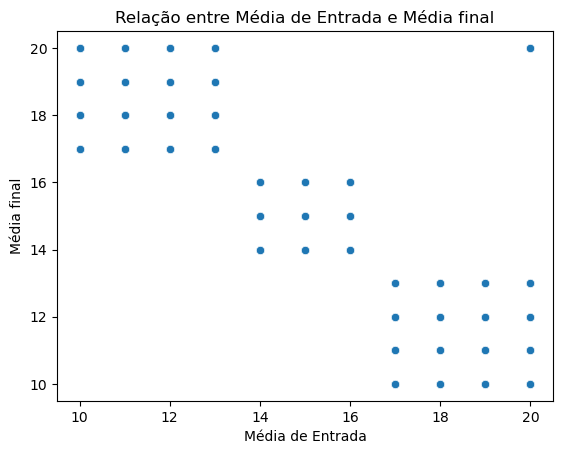

In [105]:
# Calcular a correlação
correlation = df4['media_entrada'].corr(df4['media_final'])
print(f"Correlação entre a média de entrada e a média final {correlation}")

# Criar um gráfico de dispersão
sns.scatterplot(x='media_entrada', y='media_final', data=df4)
plt.title('Relação entre Média de Entrada e Média final')
plt.xlabel('Média de Entrada')
plt.ylabel('Média final')
plt.show()

## Interpretação da Correlação
#### Correlação Forte e Negativa:
 - Uma correlação de -0,88 indica uma relação forte e negativa entre as duas variáveis.
 - Isso significa que, em geral, alunos com uma média de entrada mais alta tendem a ter uma média de conclusão mais baixa, e vice-versa.
 

## Possíveis Conclusões
#### Desempenho Inversamente Relacionado:

 - Os alunos que entram com melhores notas na licenciatura podem-se desleixar durante o curso que resulya numa média final mais baixa.
 - Alternativamente, pode haver fatores externos (por exemplo, pressão ou expectativas) que fazem com que esses alunos não mantenham o seu desempenho inicial.
 


In [106]:
# Contagem do número de alunos para cada nota na coluna 'media_final'
contagem_notas = df4['media_final'].value_counts().sort_index()

# Exibir o resultado
print(contagem_notas)

media_final
10.0    166
11.0    159
12.0    159
13.0    182
14.0    158
15.0    129
16.0    150
17.0    145
18.0    130
19.0    169
20.0    170
Name: count, dtype: int64


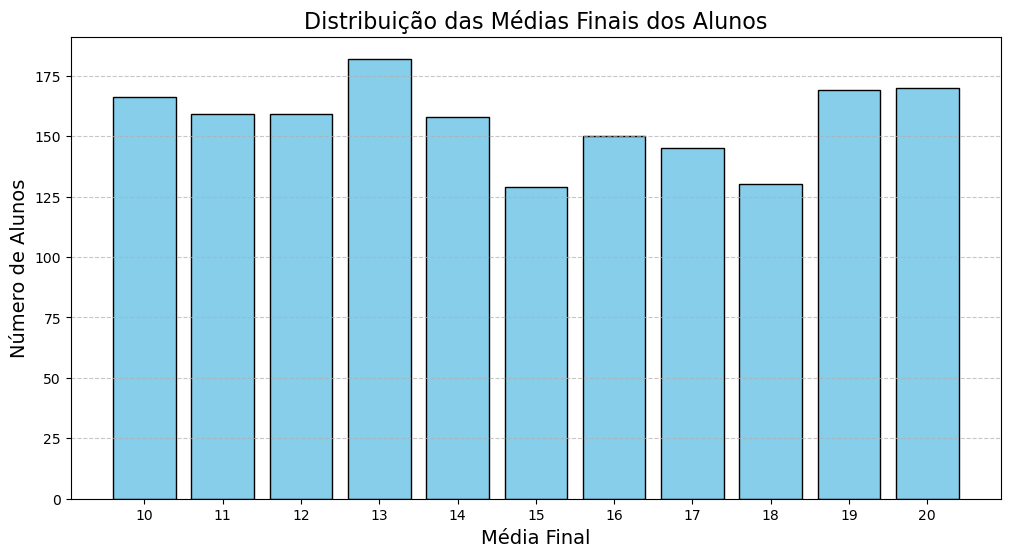

In [107]:
# Crie o histograma
plt.figure(figsize=(12, 6))
plt.bar(contagem_notas.index, contagem_notas.values, color='skyblue', edgecolor='black')
plt.xlabel('Média Final', fontsize=14)
plt.ylabel('Número de Alunos', fontsize=14)
plt.title('Distribuição das Médias Finais dos Alunos', fontsize=16)
plt.xticks(range(10, 21))  # Defina os rótulos do eixo x de 10 a 20
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibe o histograma
plt.show()